# ※ 필요한 패키지 및 데이터 불러오기

In [51]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
df = pd.read_csv('daegu.csv', encoding = 'cp949')

In [ ]:
df_pre = pd.read_csv('daegu_pre.csv')

<hr>

# Preprocessing
#### Period
- 2022-05-06

#### Index
0. 전처리 전

1. Column : hour
2. Column : lightning
3. Column : condtion
4. Column : month
5. 전처리 후

# 0. 전처리 전

In [ ]:
df

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region
0,1,0.0,0.0,16.500000,-1.0,53.0,53.0,390.0,1.0,6.0,2010,동인동
1,1,100.0,0.0,18.100000,-1.0,49.0,53.0,390.0,1.0,6.0,2010,동인동
2,1,200.0,0.0,19.700001,-1.0,46.0,53.0,390.0,1.0,6.0,2010,동인동
3,1,300.0,0.0,20.799999,-1.0,41.0,53.0,390.0,1.0,6.0,2010,동인동
4,1,400.0,0.0,22.200001,-1.0,36.0,53.0,390.0,2.0,6.0,2010,동인동
...,...,...,...,...,...,...,...,...,...,...,...,...
14831611,30,1900.0,0.0,10.700000,NaN,71.0,2.1,335.0,NaN,4.0,2022,구지면
14831612,30,2000.0,0.0,11.000000,NaN,65.0,2.2,339.0,NaN,4.0,2022,구지면
14831613,30,2100.0,0.0,11.900000,NaN,61.0,2.2,338.0,NaN,4.0,2022,구지면
14831614,30,2200.0,0.0,13.400000,NaN,53.0,2.0,351.0,NaN,4.0,2022,구지면


## 1. Column :  hour
- 시간이 24시간 형식으로 되어있음
- 시간뒤에 분을 나타내는 00이 따라옴
<br><br>
- 분은 항상 00으로 표시되므로 필요없는 데이터로 제거

In [ ]:
df1 = df[:]
df1['hour'] = df['hour']/100
df1['hour'] = df1['hour'].astype(int)

In [ ]:
df1

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region
0,1,0,0.0,16.500000,-1.0,53.0,53.0,390.0,1.0,6.0,2010,동인동
1,1,1,0.0,18.100000,-1.0,49.0,53.0,390.0,1.0,6.0,2010,동인동
2,1,2,0.0,19.700001,-1.0,46.0,53.0,390.0,1.0,6.0,2010,동인동
3,1,3,0.0,20.799999,-1.0,41.0,53.0,390.0,1.0,6.0,2010,동인동
4,1,4,0.0,22.200001,-1.0,36.0,53.0,390.0,2.0,6.0,2010,동인동
...,...,...,...,...,...,...,...,...,...,...,...,...
14831611,30,19,0.0,10.700000,NaN,71.0,2.1,335.0,NaN,4.0,2022,구지면
14831612,30,20,0.0,11.000000,NaN,65.0,2.2,339.0,NaN,4.0,2022,구지면
14831613,30,21,0.0,11.900000,NaN,61.0,2.2,338.0,NaN,4.0,2022,구지면
14831614,30,22,0.0,13.400000,NaN,53.0,2.0,351.0,NaN,4.0,2022,구지면


## 2. Column : lightning
- 0, 1 로 번개의 여부를 표현
    0 : 번개 X
    1 : 번개 O
    -1 : 미측정
- 어느날을 기준으로 측정하지 않아 None 값이 저장
<br><br>
- -1과 None 값을 통일시켜줄 필요가 있음

In [ ]:
df2 = df1[:]
df2['lightning'] = df2['lightning'].fillna(-1)
df2['lightning'] = df2['lightning'].astype(int)

In [ ]:
df2

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region
0,1,0,0.0,16.500000,-1,53.0,53.0,390.0,1.0,6.0,2010,동인동
1,1,1,0.0,18.100000,-1,49.0,53.0,390.0,1.0,6.0,2010,동인동
2,1,2,0.0,19.700001,-1,46.0,53.0,390.0,1.0,6.0,2010,동인동
3,1,3,0.0,20.799999,-1,41.0,53.0,390.0,1.0,6.0,2010,동인동
4,1,4,0.0,22.200001,-1,36.0,53.0,390.0,2.0,6.0,2010,동인동
...,...,...,...,...,...,...,...,...,...,...,...,...
14831611,30,19,0.0,10.700000,-1,71.0,2.1,335.0,NaN,4.0,2022,구지면
14831612,30,20,0.0,11.000000,-1,65.0,2.2,339.0,NaN,4.0,2022,구지면
14831613,30,21,0.0,11.900000,-1,61.0,2.2,338.0,NaN,4.0,2022,구지면
14831614,30,22,0.0,13.400000,-1,53.0,2.0,351.0,NaN,4.0,2022,구지면


## 3. Column : condition
- 1,2,3,4 로 구름의 양을 표현
    - 1 : 맑음
    - 2 : 구름 조금
    - 3 : 구름 많음
    - 4 : 흐림
    - -1 : 미측정
- 어느날을 기준으로 측정하지 않아 None 값이 저장
<br><br>
- -1과 None 값을 통일시켜줄 필요가 있음

In [ ]:
df3 = df2[:]
df3['condition'] = df3['condition'].fillna(-1)
df3['condition'] = df3['condition'].astype(int)

In [ ]:
df3

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region
0,1,0,0.0,16.500000,-1,53.0,53.0,390.0,1,6.0,2010,동인동
1,1,1,0.0,18.100000,-1,49.0,53.0,390.0,1,6.0,2010,동인동
2,1,2,0.0,19.700001,-1,46.0,53.0,390.0,1,6.0,2010,동인동
3,1,3,0.0,20.799999,-1,41.0,53.0,390.0,1,6.0,2010,동인동
4,1,4,0.0,22.200001,-1,36.0,53.0,390.0,2,6.0,2010,동인동
...,...,...,...,...,...,...,...,...,...,...,...,...
14831611,30,19,0.0,10.700000,-1,71.0,2.1,335.0,-1,4.0,2022,구지면
14831612,30,20,0.0,11.000000,-1,65.0,2.2,339.0,-1,4.0,2022,구지면
14831613,30,21,0.0,11.900000,-1,61.0,2.2,338.0,-1,4.0,2022,구지면
14831614,30,22,0.0,13.400000,-1,53.0,2.0,351.0,-1,4.0,2022,구지면


## 4. Column : month
- 월을 정수형으로 표현

In [ ]:
df4 = df3[:]
df4['month'] = df4['month'].astype(int)

In [ ]:
df4

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region
0,1,0,0.0,16.500000,-1,53.0,53.0,390.0,1,6,2010,동인동
1,1,1,0.0,18.100000,-1,49.0,53.0,390.0,1,6,2010,동인동
2,1,2,0.0,19.700001,-1,46.0,53.0,390.0,1,6,2010,동인동
3,1,3,0.0,20.799999,-1,41.0,53.0,390.0,1,6,2010,동인동
4,1,4,0.0,22.200001,-1,36.0,53.0,390.0,2,6,2010,동인동
...,...,...,...,...,...,...,...,...,...,...,...,...
14831611,30,19,0.0,10.700000,-1,71.0,2.1,335.0,-1,4,2022,구지면
14831612,30,20,0.0,11.000000,-1,65.0,2.2,339.0,-1,4,2022,구지면
14831613,30,21,0.0,11.900000,-1,61.0,2.2,338.0,-1,4,2022,구지면
14831614,30,22,0.0,13.400000,-1,53.0,2.0,351.0,-1,4,2022,구지면


## 5. 전처리 후

In [ ]:
df_final = df4
df_final

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region
0,1,0,0.0,16.500000,-1,53.0,53.0,390.0,1,6,2010,동인동
1,1,1,0.0,18.100000,-1,49.0,53.0,390.0,1,6,2010,동인동
2,1,2,0.0,19.700001,-1,46.0,53.0,390.0,1,6,2010,동인동
3,1,3,0.0,20.799999,-1,41.0,53.0,390.0,1,6,2010,동인동
4,1,4,0.0,22.200001,-1,36.0,53.0,390.0,2,6,2010,동인동
...,...,...,...,...,...,...,...,...,...,...,...,...
14831611,30,19,0.0,10.700000,-1,71.0,2.1,335.0,-1,4,2022,구지면
14831612,30,20,0.0,11.000000,-1,65.0,2.2,339.0,-1,4,2022,구지면
14831613,30,21,0.0,11.900000,-1,61.0,2.2,338.0,-1,4,2022,구지면
14831614,30,22,0.0,13.400000,-1,53.0,2.0,351.0,-1,4,2022,구지면


In [ ]:
df5 = df4[:]

df5['temp_F'] = df5['temp'] * 1.8 + 32

df5['HI'] =  -42.379 + 2.04901523*df5['temp_F'] + 10.14333127*df5['humidity'] - .22475541*df5['temp_F']*df5['humidity'] - .00683783*df5['temp_F']*df5['temp_F'] - .05481717*df5['humidity']*df5['humidity'] + .00122874*df5['temp_F']*df5['temp_F']*df5['humidity'] + .00085282*df5['temp_F']*df5['humidity']*df5['humidity'] - .00000199*df5['temp_F']*df5['temp_F']*df5['humidity']*df5['humidity']

index = list(df5[(df5['humidity'] <= 13) & (df5['temp_F'] >= 80) & (df5['temp_F'] <= 112)].index)
df5.loc[index,'HI'] = df5.loc[index,'HI'] - ((13 - df5.loc[index,'humidity']) / 4) * ((17 - abs(df5.loc[index,'temp_F'] - 95)) / 17) ** 0.5

index = list(df5[(df5['humidity'] > 85) & (df5['temp_F'] >= 80) & (df5['temp_F'] <= 87)].index)
df5.loc[index,'HI'] = df5.loc[index,'HI'] + 0.02 * (df5.loc[index,'humidity'] - 85) * (87 - df5.loc[index,'temp_F'])

df5['A'] = -10.3 + 1.1 * df5['temp_F'] + 0.047 * df5['humidity']
index = list(df5.loc[df5['A'] < 79].index)
df5.loc[index,'HI'] = df5.loc[index,'A']

index = list(df5.loc[df5['temp_F'] < 40].index)
df5.loc[index,'HI'] = df5.loc[index,'temp_F']

df5.drop(columns = ['A'], axis=1, inplace=True)
df5.drop(columns = 'temp_F', axis=1, inplace=True)
df5['HI'] = (df5['HI'] - 32) / 1.8
df5

C:\Users\User\AppData\Local\Temp\ipykernel_24644\2801911579.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['temp_F'] = df5['temp'] * 1.8 + 32
C:\Users\User\AppData\Local\Temp\ipykernel_24644\2801911579.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['HI'] =  -42.379 + 2.04901523*df5['temp_F'] + 10.14333127*df5['humidity'] - .22475541*df5['temp_F']*df5['humidity'] - .00683783*df5['temp_F']*df5['temp_F'] - .05481717*df5['humidity']*df5['humidity'] + .00122874*df5['temp_F']*df5['temp_F']*df5['

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region,HI
0,1,0,0.0,16.500000,-1,53.0,53.0,390.0,1,6,2010,동인동,15.589444
1,1,1,0.0,18.100000,-1,49.0,53.0,390.0,1,6,2010,동인동,17.245000
2,1,2,0.0,19.700001,-1,46.0,53.0,390.0,1,6,2010,동인동,18.926668
3,1,3,0.0,20.799999,-1,41.0,53.0,390.0,1,6,2010,동인동,20.006110
4,1,4,0.0,22.200001,-1,36.0,53.0,390.0,2,6,2010,동인동,21.415557
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14831611,30,19,0.0,10.700000,-1,71.0,2.1,335.0,-1,4,2022,구지면,9.679444
14831612,30,20,0.0,11.000000,-1,65.0,2.2,339.0,-1,4,2022,구지면,9.852778
14831613,30,21,0.0,11.900000,-1,61.0,2.2,338.0,-1,4,2022,구지면,10.738333
14831614,30,22,0.0,13.400000,-1,53.0,2.0,351.0,-1,4,2022,구지면,12.179444


In [ ]:
# 전처리된 데이터프레임을 저장한 뒤 이후에는 해당 파일을 불러서 사용
df_final.to_csv('daegu_pre.csv', index_label=False)

KeyboardInterrupt: 

In [ ]:
df_region = pd.read_csv('./dataset/Daegu/0 REGION.csv')
df_region

C:\Users\User\AppData\Local\Temp\ipykernel_24644\2812696719.py:1: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_region = pd.read_csv('./dataset/Daegu/0 REGION.csv')


,1단계,2단계,3단계
0,대구광역시,중구,동인동
1,대구광역시,중구,삼덕동
2,대구광역시,중구,성내1동
3,대구광역시,중구,성내2동
4,대구광역시,중구,성내3동
...,...,...,...
1044924,NaN,NaN,NaN
1044925,NaN,NaN,NaN
1044926,NaN,NaN,NaN
1044927,NaN,NaN,NaN


In [ ]:
index_None = df_region[df_region['1단계'].isna()].index
df_region.drop(index_None, inplace=True)
df_region.drop('1단계', axis=1, inplace=True)
df_region.columns = ['region2','region']

In [ ]:
df_region

,region2,region
0,중구,동인동
1,중구,삼덕동
2,중구,성내1동
3,중구,성내2동
4,중구,성내3동
...,...,...
137,달성군,옥포읍
138,달성군,현풍읍
139,달성군,가창면
140,달성군,하빈면


In [ ]:
df5

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region,HI
0,1,0,0.0,16.500000,-1,53.0,53.0,390.0,1,6,2010,동인동,15.589444
1,1,1,0.0,18.100000,-1,49.0,53.0,390.0,1,6,2010,동인동,17.245000
2,1,2,0.0,19.700001,-1,46.0,53.0,390.0,1,6,2010,동인동,18.926668
3,1,3,0.0,20.799999,-1,41.0,53.0,390.0,1,6,2010,동인동,20.006110
4,1,4,0.0,22.200001,-1,36.0,53.0,390.0,2,6,2010,동인동,21.415557
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14831611,30,19,0.0,10.700000,-1,71.0,2.1,335.0,-1,4,2022,구지면,9.679444
14831612,30,20,0.0,11.000000,-1,65.0,2.2,339.0,-1,4,2022,구지면,9.852778
14831613,30,21,0.0,11.900000,-1,61.0,2.2,338.0,-1,4,2022,구지면,10.738333
14831614,30,22,0.0,13.400000,-1,53.0,2.0,351.0,-1,4,2022,구지면,12.179444


In [ ]:
df_11 = df5.merge(df_region, on='region')

In [ ]:
df_11

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region,HI,region2
0,1,0,0.0,16.500000,-1,53.0,53.0,390.0,1,6,2010,동인동,15.589444,중구
1,1,1,0.0,18.100000,-1,49.0,53.0,390.0,1,6,2010,동인동,17.245000,중구
2,1,2,0.0,19.700001,-1,46.0,53.0,390.0,1,6,2010,동인동,18.926668,중구
3,1,3,0.0,20.799999,-1,41.0,53.0,390.0,1,6,2010,동인동,20.006110,중구
4,1,4,0.0,22.200001,-1,36.0,53.0,390.0,2,6,2010,동인동,21.415557,중구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14727163,30,19,0.0,10.700000,-1,71.0,2.1,335.0,-1,4,2022,구지면,9.679444,달성군
14727164,30,20,0.0,11.000000,-1,65.0,2.2,339.0,-1,4,2022,구지면,9.852778,달성군
14727165,30,21,0.0,11.900000,-1,61.0,2.2,338.0,-1,4,2022,구지면,10.738333,달성군
14727166,30,22,0.0,13.400000,-1,53.0,2.0,351.0,-1,4,2022,구지면,12.179444,달성군


<hr>

# EDA

#### Period
- 2022-05-06 ~ ???

#### Index
0. 기본적인 데이터 탐색

1. 겨울에 따뜻하면 여름에 폭염이 나타난다.
2. 인구밀도가 높은 지역은 상대적으로 열지수가 높다.
3. 지역용도에 따라 열지수의 차이가 나타난다.( 공단,상업,주거,산지,빌딩숲 등)
4. 기저질환 환자가 온열질환 취약계층이다.
5. 대구의 지형 특징상(분지) 열섬현상이 자주 발생한다.
6. 겨울에 추우면 전력 소비량과 온실 가스 배출량이 늘어 여름에 덥다.
7. 교통량이 많으면 엔진의 열배출이 기온에 영향을 미친다. 
8. 비가 온 날이 많으면 폭염기간에 열지수가 높다. (폭염과 습도의 관계)
9. 대기중의 미세먼지 농도가 높으면 온도가 높다.(‘미세먼지가 많으면 통풍이 잘 안된다’ 속설 검증)
10. 나무를 많이 심으면 온도가 떨어진다. (대구 녹지사업 참고)

## 0. 기본적인 데이터 탐색
- made by SSJ

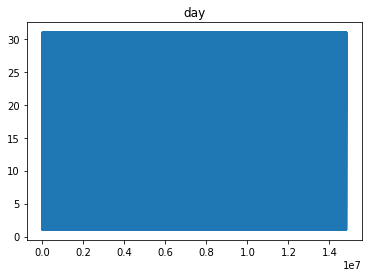

In [ ]:

plt.plot(df_final['day'])
plt.title('day')
plt.show()

# 1. 겨울에 따뜻하면 여름에 폭염이 나타난다.
- made by 

# 2. 인구밀도가 높은 지역은 상대적으로 열지수가 높다.
- made by 

# 3. 지역용도에 따라 열지수의 차이가 나타난다.( 공단,상업,주거,산지,빌딩숲 등)
- made by 

In [109]:
#지역용도 데이터 로드
use = pd.read_csv('./dataset/대구_용도지역.csv', encoding='cp949', skiprows=1)

In [110]:
use

,시점,행정구역(구군)별(1),소계,도시지역 인구수,비도시지역 인구수,소계.1,소계.2,주거지역,주거지역.1,주거지역.2,...,녹지지역.2,녹지지역.3,미지정,소계.3,계획관리지역,생산관리지역,보전관리지역,농림지역,자연환경 보전지역,자연환경 보전지역.1
0,시점,행정구역(구군)별(1),소계,소계,소계,소계,소계,소계,전용주거지역,전용주거지역,...,생산,자연,소계,소계,소계,소계,소계,소계,소계,자연환경 보전지역 지정비율 (%)
1,시점,행정구역(구군)별(1),소계,소계,소계,소계,소계,소계,소계,제1종전용,...,소계,소계,소계,소계,소계,소계,소계,소계,소계,소계
2,2010,합계,2532077,2488355,43722,884.10,798.50,119.41,1.05,0.80,...,15.33,567.71,-,85.60,-,0.23,-,37.07,48.30,-
3,2011,합계,2529285,2484439,44846,883.68,798.08,119.97,1.05,0.80,...,15.33,566.67,-,85.60,-,0.23,-,37.07,48.30,56.42
4,2011,중구,77319,77319,-,7.05,7.05,3.38,-,-,...,-,0.55,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2019,남구,149660,149660,-,17.43,17.43,8.11,-,-,...,-,8.28,-,-,-,-,-,-,-,-
80,2019,북구,442943,442943,-,93.98,93.98,20.16,0.15,0.15,...,0.07,65.20,-,-,-,-,-,-,-,-
81,2019,수성구,430334,430334,-,76.54,76.54,18.30,-,-,...,0.28,56.02,-,-,-,-,-,-,-,-
82,2019,달서구,579352,579352,-,62.34,62.34,20.89,0.00,0.00,...,0.03,27.55,-,-,-,-,-,-,-,-


In [111]:
# 인덱스 설정
use = use.drop(use.index[1])
use

,시점,행정구역(구군)별(1),소계,도시지역 인구수,비도시지역 인구수,소계.1,소계.2,주거지역,주거지역.1,주거지역.2,...,녹지지역.2,녹지지역.3,미지정,소계.3,계획관리지역,생산관리지역,보전관리지역,농림지역,자연환경 보전지역,자연환경 보전지역.1
0,시점,행정구역(구군)별(1),소계,소계,소계,소계,소계,소계,전용주거지역,전용주거지역,...,생산,자연,소계,소계,소계,소계,소계,소계,소계,자연환경 보전지역 지정비율 (%)
2,2010,합계,2532077,2488355,43722,884.10,798.50,119.41,1.05,0.80,...,15.33,567.71,-,85.60,-,0.23,-,37.07,48.30,-
3,2011,합계,2529285,2484439,44846,883.68,798.08,119.97,1.05,0.80,...,15.33,566.67,-,85.60,-,0.23,-,37.07,48.30,56.42
4,2011,중구,77319,77319,-,7.05,7.05,3.38,-,-,...,-,0.55,-,-,-,-,-,-,-,-
5,2011,동구,342715,342715,-,182.22,146.92,20.88,0.68,0.65,...,0.40,108.09,-,35.30,-,-,-,-,35.30,100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2019,남구,149660,149660,-,17.43,17.43,8.11,-,-,...,-,8.28,-,-,-,-,-,-,-,-
80,2019,북구,442943,442943,-,93.98,93.98,20.16,0.15,0.15,...,0.07,65.20,-,-,-,-,-,-,-,-
81,2019,수성구,430334,430334,-,76.54,76.54,18.30,-,-,...,0.28,56.02,-,-,-,-,-,-,-,-
82,2019,달서구,579352,579352,-,62.34,62.34,20.89,0.00,0.00,...,0.03,27.55,-,-,-,-,-,-,-,-


In [112]:
# column 이름 확인
use.columns

Index(['시점', '행정구역(구군)별(1)', '소계', '도시지역 인구수', '비도시지역 인구수', '소계.1', '소계.2',
       '주거지역', '주거지역.1', '주거지역.2', '주거지역.3', '주거지역.4', '주거지역.5', '주거지역.6',
       '주거지역.7', '주거지역.8', '상업지역', '상업지역.1', '상업지역.2', '상업지역.3', '상업지역.4',
       '공업지역', '공업지역.1', '공업지역.2', '공업지역.3', '녹지지역', '녹지지역.1', '녹지지역.2',
       '녹지지역.3', '미지정', '소계.3', '계획관리지역', '생산관리지역', '보전관리지역', '농림지역',
       '자연환경 보전지역', '자연환경 보전지역.1'],
      dtype='object')

In [113]:
# 지역 용도 데이터  열 삭제
filter = use.drop(['주거지역.1', '주거지역.2', '주거지역.3', '주거지역.4', '주거지역.5', '주거지역.6',
       '주거지역.7', '주거지역.8', '상업지역.1', '상업지역.2', '상업지역.3', '상업지역.4', '공업지역.1', '공업지역.2', '공업지역.3', '녹지지역.1', '녹지지역.2',
       '녹지지역.3', '미지정', '자연환경 보전지역.1', '계획관리지역', '보전관리지역'], axis=1)
filter=filter.drop(filter.index[0])

In [114]:
# 지역 용도 데이터  열 이름 재설정
filter.rename(columns={'시점':'year', '행정구역(구군)별(1)':'region2', '소계': 'total_pop', '도시지역 인구수':'urban_pop', '비도시지역 인구수':'nonurban_pop', 
               '소계.1':'total', '소계.2':'total_urban', '주거지역':'house', '상업지역':'commercial',
                '공업지역':'industrial', '녹지지역':'green', '소계.3':'total_nonurban', '생산관리지역':'production', 
                '농림지역':'agriculture', '자연환경 보전지역':'natural_environment_conservation'}, inplace=True)

In [115]:
# 지역 용도 데이터 인덱스 재설정
filter.reset_index(drop=True, inplace=True)
filter

,year,region2,total_pop,urban_pop,nonurban_pop,total,total_urban,house,commercial,industrial,green,total_nonurban,production,agriculture,natural_environment_conservation
0,2010,합계,2532077,2488355,43722,884.10,798.50,119.41,18.25,39.82,621.02,85.60,0.23,37.07,48.30
1,2011,합계,2529285,2484439,44846,883.68,798.08,119.97,18.27,39.85,619.98,85.60,0.23,37.07,48.30
2,2011,중구,77319,77319,-,7.05,7.05,3.38,3.12,-,0.55,-,-,-,-
3,2011,동구,342715,342715,-,182.22,146.92,20.88,3.71,0.81,121.51,35.30,-,-,35.30
4,2011,서구,224552,224552,-,17.48,17.48,7.68,1.29,4.08,4.44,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,2019,남구,149660,149660,-,17.43,17.43,8.11,1.05,-,8.28,-,-,-,-
78,2019,북구,442943,442943,-,93.98,93.98,20.16,3.50,5.01,65.32,-,-,-,-
79,2019,수성구,430334,430334,-,76.54,76.54,18.30,1.93,-,56.31,-,-,-,-
80,2019,달서구,579352,579352,-,62.34,62.34,20.89,2.44,11.40,27.61,-,-,-,-


In [116]:
# 지역 용도 데이터 중 합계 열 삭제
filter=filter[filter.region2 != '합계']
filter
# total_urban =  

,year,region2,total_pop,urban_pop,nonurban_pop,total,total_urban,house,commercial,industrial,green,total_nonurban,production,agriculture,natural_environment_conservation
2,2011,중구,77319,77319,-,7.05,7.05,3.38,3.12,-,0.55,-,-,-,-
3,2011,동구,342715,342715,-,182.22,146.92,20.88,3.71,0.81,121.51,35.30,-,-,35.30
4,2011,서구,224552,224552,-,17.48,17.48,7.68,1.29,4.08,4.44,-,-,-,-
5,2011,남구,169995,169995,-,17.43,17.43,8.10,1.05,-,8.29,-,-,-,-
6,2011,북구,454135,454135,-,94.08,94.08,18.85,3.62,3.81,67.80,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,2019,남구,149660,149660,-,17.43,17.43,8.11,1.05,-,8.28,-,-,-,-
78,2019,북구,442943,442943,-,93.98,93.98,20.16,3.50,5.01,65.32,-,-,-,-
79,2019,수성구,430334,430334,-,76.54,76.54,18.30,1.93,-,56.31,-,-,-,-
80,2019,달서구,579352,579352,-,62.34,62.34,20.89,2.44,11.40,27.61,-,-,-,-


In [117]:
# 데이터형 확인
filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 2 to 81
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   year                              72 non-null     object
 1   region2                           72 non-null     object
 2   total_pop                         72 non-null     object
 3   urban_pop                         72 non-null     object
 4   nonurban_pop                      72 non-null     object
 5   total                             72 non-null     object
 6   total_urban                       72 non-null     object
 7   house                             72 non-null     object
 8   commercial                        72 non-null     object
 9   industrial                        72 non-null     object
 10  green                             72 non-null     object
 11  total_nonurban                    72 non-null     object
 12  production              

In [119]:
# '-' 값 '0'로 값 대체
filter.replace('-', 0, inplace=True)
filter

C:\Users\User\AppData\Local\Temp\ipykernel_24644\323670318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter.replace('-', 0, inplace=True)


,year,region2,total_pop,urban_pop,nonurban_pop,total,total_urban,house,commercial,industrial,green,total_nonurban,production,agriculture,natural_environment_conservation
2,2011,중구,77319,77319,0,7.05,7.05,3.38,3.12,0,0.55,0,0,0,0
3,2011,동구,342715,342715,0,182.22,146.92,20.88,3.71,0.81,121.51,35.30,0,0,35.30
4,2011,서구,224552,224552,0,17.48,17.48,7.68,1.29,4.08,4.44,0,0,0,0
5,2011,남구,169995,169995,0,17.43,17.43,8.10,1.05,0,8.29,0,0,0,0
6,2011,북구,454135,454135,0,94.08,94.08,18.85,3.62,3.81,67.80,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,2019,남구,149660,149660,0,17.43,17.43,8.11,1.05,0,8.28,0,0,0,0
78,2019,북구,442943,442943,0,93.98,93.98,20.16,3.50,5.01,65.32,0,0,0,0
79,2019,수성구,430334,430334,0,76.54,76.54,18.30,1.93,0,56.31,0,0,0,0
80,2019,달서구,579352,579352,0,62.34,62.34,20.89,2.44,11.40,27.61,0,0,0,0


In [120]:
# total_pop ~ 까지 데이터형 변환
a=filter.iloc[:, 2:].apply(pd.to_numeric)
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 2 to 81
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   total_pop                         72 non-null     int64  
 1   urban_pop                         72 non-null     int64  
 2   nonurban_pop                      72 non-null     int64  
 3   total                             72 non-null     float64
 4   total_urban                       72 non-null     float64
 5   house                             72 non-null     float64
 6   commercial                        72 non-null     float64
 7   industrial                        72 non-null     float64
 8   green                             72 non-null     float64
 9   total_nonurban                    72 non-null     float64
 10  production                        72 non-null     float64
 11  agriculture                       72 non-null     float64
 12  natural_en

In [121]:
# year, region2 데이터 가져오기
filter_a=filter.iloc[:, 0:2]
filter_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 2 to 81
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   year     72 non-null     object
 1   region2  72 non-null     object
dtypes: object(2)
memory usage: 1.7+ KB


In [122]:
# year, region2 데이터와 total_pop~ 데이터 합치기
df=pd.concat([filter_a, a], axis=1)
df

,year,region2,total_pop,urban_pop,nonurban_pop,total,total_urban,house,commercial,industrial,green,total_nonurban,production,agriculture,natural_environment_conservation
2,2011,중구,77319,77319,0,7.05,7.05,3.38,3.12,0.00,0.55,0.00,0.0,0.00,0.0
3,2011,동구,342715,342715,0,182.22,146.92,20.88,3.71,0.81,121.51,35.30,0.0,0.00,35.3
4,2011,서구,224552,224552,0,17.48,17.48,7.68,1.29,4.08,4.44,0.00,0.0,0.00,0.0
5,2011,남구,169995,169995,0,17.43,17.43,8.10,1.05,0.00,8.29,0.00,0.0,0.00,0.0
6,2011,북구,454135,454135,0,94.08,94.08,18.85,3.62,3.81,67.80,0.00,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,2019,남구,149660,149660,0,17.43,17.43,8.11,1.05,0.00,8.28,0.00,0.0,0.00,0.0
78,2019,북구,442943,442943,0,93.98,93.98,20.16,3.50,5.01,65.32,0.00,0.0,0.00,0.0
79,2019,수성구,430334,430334,0,76.54,76.54,18.30,1.93,0.00,56.31,0.00,0.0,0.00,0.0
80,2019,달서구,579352,579352,0,62.34,62.34,20.89,2.44,11.40,27.61,0.00,0.0,0.00,0.0


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 2 to 81
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   year                              72 non-null     object 
 1   region2                           72 non-null     object 
 2   total_pop                         72 non-null     int64  
 3   urban_pop                         72 non-null     int64  
 4   nonurban_pop                      72 non-null     int64  
 5   total                             72 non-null     float64
 6   total_urban                       72 non-null     float64
 7   house                             72 non-null     float64
 8   commercial                        72 non-null     float64
 9   industrial                        72 non-null     float64
 10  green                             72 non-null     float64
 11  total_nonurban                    72 non-null     float64
 12  production

In [ ]:
# df.replace('NA', '-', inplace=True)
# df

In [ ]:
# df['house/total']= df['house']/df['total']
# df

In [ ]:
# df=df.drop(['house/total'], axis=1)
# df

KeyError: "['house/total'] not found in axis"

In [125]:
# 전체 면적별 용도별 면적 비율 계산
for i in range(7, 15):
    print(df.iloc[:, i]/df.iloc[:, 5])
    #df = pd.read_excel('data/A12{0}.csv'.format(j))
    name=df.columns[i]
    df['{0}/total'.format(name)] = df.iloc[:, i]/df.iloc[:, 5]

2     0.479433
3     0.114587
4     0.439359
5     0.464716
6     0.200361
        ...   
77    0.465290
78    0.214514
79    0.239091
80    0.335098
81    0.050974
Length: 72, dtype: float64
2     0.442553
3     0.020360
4     0.073799
5     0.060241
6     0.038478
        ...   
77    0.060241
78    0.037242
79    0.025216
80    0.039140
81    0.003164
Length: 72, dtype: float64
2     0.000000
3     0.004445
4     0.233410
5     0.000000
6     0.040497
        ...   
77    0.000000
78    0.053309
79    0.000000
80    0.182868
81    0.046240
Length: 72, dtype: float64
2     0.078014
3     0.666831
4     0.254005
5     0.475617
6     0.720663
        ...   
77    0.475043
78    0.695041
79    0.735694
80    0.442894
81    0.785043
Length: 72, dtype: float64
2     0.000000
3     0.193722
4     0.000000
5     0.000000
6     0.000000
        ...   
77    0.000000
78    0.000000
79    0.000000
80    0.000000
81    0.114580
Length: 72, dtype: float64
2     0.0
3     0.0
4     0.0
5     0.0


In [126]:
df

,year,region2,total_pop,urban_pop,nonurban_pop,total,total_urban,house,commercial,industrial,...,agriculture,natural_environment_conservation,house/total,commercial/total,industrial/total,green/total,total_nonurban/total,production/total,agriculture/total,natural_environment_conservation/total
2,2011,중구,77319,77319,0,7.05,7.05,3.38,3.12,0.00,...,0.00,0.0,0.479433,0.442553,0.000000,0.078014,0.000000,0.0,0.000000,0.000000
3,2011,동구,342715,342715,0,182.22,146.92,20.88,3.71,0.81,...,0.00,35.3,0.114587,0.020360,0.004445,0.666831,0.193722,0.0,0.000000,0.193722
4,2011,서구,224552,224552,0,17.48,17.48,7.68,1.29,4.08,...,0.00,0.0,0.439359,0.073799,0.233410,0.254005,0.000000,0.0,0.000000,0.000000
5,2011,남구,169995,169995,0,17.43,17.43,8.10,1.05,0.00,...,0.00,0.0,0.464716,0.060241,0.000000,0.475617,0.000000,0.0,0.000000,0.000000
6,2011,북구,454135,454135,0,94.08,94.08,18.85,3.62,3.81,...,0.00,0.0,0.200361,0.038478,0.040497,0.720663,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,2019,남구,149660,149660,0,17.43,17.43,8.11,1.05,0.00,...,0.00,0.0,0.465290,0.060241,0.000000,0.475043,0.000000,0.0,0.000000,0.000000
78,2019,북구,442943,442943,0,93.98,93.98,20.16,3.50,5.01,...,0.00,0.0,0.214514,0.037242,0.053309,0.695041,0.000000,0.0,0.000000,0.000000
79,2019,수성구,430334,430334,0,76.54,76.54,18.30,1.93,0.00,...,0.00,0.0,0.239091,0.025216,0.000000,0.735694,0.000000,0.0,0.000000,0.000000
80,2019,달서구,579352,579352,0,62.34,62.34,20.89,2.44,11.40,...,0.00,0.0,0.335098,0.039140,0.182868,0.442894,0.000000,0.0,0.000000,0.000000


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 2 to 81
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   year                                    72 non-null     object 
 1   region2                                 72 non-null     object 
 2   total_pop                               72 non-null     int64  
 3   urban_pop                               72 non-null     int64  
 4   nonurban_pop                            72 non-null     int64  
 5   total                                   72 non-null     float64
 6   total_urban                             72 non-null     float64
 7   house                                   72 non-null     float64
 8   commercial                              72 non-null     float64
 9   industrial                              72 non-null     float64
 10  green                                   72 non-null     float64


In [128]:
df.groupby([ 'region2', 'year'], as_index=False)['house/total'].max()

,region2,year,house/total
0,남구,2011,0.464716
1,남구,2012,0.464450
2,남구,2013,0.464450
3,남구,2014,0.464450
4,남구,2015,0.464450
...,...,...,...
67,중구,2015,0.478754
68,중구,2016,0.479433
69,중구,2017,0.478754
70,중구,2018,0.478754


In [ ]:
c=df.iloc[:, 15:]
c

,house/total,commercial/total,industrial/total,green/total,total_nonurban/total,production/total,agriculture/total,natural_environment_conservation/total
2,0.479433,0.442553,0.000000,0.078014,0.000000,0.0,0.000000,0.000000
3,0.114587,0.020360,0.004445,0.666831,0.193722,0.0,0.000000,0.193722
4,0.439359,0.073799,0.233410,0.254005,0.000000,0.0,0.000000,0.000000
5,0.464716,0.060241,0.000000,0.475617,0.000000,0.0,0.000000,0.000000
6,0.200361,0.038478,0.040497,0.720663,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...
77,0.465290,0.060241,0.000000,0.475043,0.000000,0.0,0.000000,0.000000
78,0.214514,0.037242,0.053309,0.695041,0.000000,0.0,0.000000,0.000000
79,0.239091,0.025216,0.000000,0.735694,0.000000,0.0,0.000000,0.000000
80,0.335098,0.039140,0.182868,0.442894,0.000000,0.0,0.000000,0.000000


In [ ]:
b=pd.concat([filter_a, c], axis=1)
b

,year,region2,house/total,commercial/total,industrial/total,green/total,total_nonurban/total,production/total,agriculture/total,natural_environment_conservation/total
2,2011,중구,0.479433,0.442553,0.000000,0.078014,0.000000,0.0,0.000000,0.000000
3,2011,동구,0.114587,0.020360,0.004445,0.666831,0.193722,0.0,0.000000,0.193722
4,2011,서구,0.439359,0.073799,0.233410,0.254005,0.000000,0.0,0.000000,0.000000
5,2011,남구,0.464716,0.060241,0.000000,0.475617,0.000000,0.0,0.000000,0.000000
6,2011,북구,0.200361,0.038478,0.040497,0.720663,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
77,2019,남구,0.465290,0.060241,0.000000,0.475043,0.000000,0.0,0.000000,0.000000
78,2019,북구,0.214514,0.037242,0.053309,0.695041,0.000000,0.0,0.000000,0.000000
79,2019,수성구,0.239091,0.025216,0.000000,0.735694,0.000000,0.0,0.000000,0.000000
80,2019,달서구,0.335098,0.039140,0.182868,0.442894,0.000000,0.0,0.000000,0.000000


In [ ]:
df_11

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region,HI,region2
0,1,0,0.0,16.500000,-1,53.0,53.0,390.0,1,6,2010,동인동,15.589444,중구
1,1,1,0.0,18.100000,-1,49.0,53.0,390.0,1,6,2010,동인동,17.245000,중구
2,1,2,0.0,19.700001,-1,46.0,53.0,390.0,1,6,2010,동인동,18.926668,중구
3,1,3,0.0,20.799999,-1,41.0,53.0,390.0,1,6,2010,동인동,20.006110,중구
4,1,4,0.0,22.200001,-1,36.0,53.0,390.0,2,6,2010,동인동,21.415557,중구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14727163,30,19,0.0,10.700000,-1,71.0,2.1,335.0,-1,4,2022,구지면,9.679444,달성군
14727164,30,20,0.0,11.000000,-1,65.0,2.2,339.0,-1,4,2022,구지면,9.852778,달성군
14727165,30,21,0.0,11.900000,-1,61.0,2.2,338.0,-1,4,2022,구지면,10.738333,달성군
14727166,30,22,0.0,13.400000,-1,53.0,2.0,351.0,-1,4,2022,구지면,12.179444,달성군


In [ ]:
b['year']=b['year'].astype(int)

In [ ]:
merge=df_11.merge(b, on =['year', 'region2'])
merge

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,...,HI,region2,house/total,commercial/total,industrial/total,green/total,total_nonurban/total,production/total,agriculture/total,natural_environment_conservation/total
0,1,0,0.0,-5.1,-1,39.0,3.6,267.0,2,1,...,-5.1,중구,0.479433,0.442553,0.00000,0.078014,0.00000,0.0,0.000000,0.000000
1,1,1,0.0,-3.6,-1,34.0,5.0,267.0,1,1,...,-3.6,중구,0.479433,0.442553,0.00000,0.078014,0.00000,0.0,0.000000,0.000000
2,1,2,0.0,-1.3,-1,33.0,3.1,279.0,1,1,...,-1.3,중구,0.479433,0.442553,0.00000,0.078014,0.00000,0.0,0.000000,0.000000
3,1,3,0.0,0.0,-1,35.0,4.1,286.0,1,1,...,0.0,중구,0.479433,0.442553,0.00000,0.078014,0.00000,0.0,0.000000,0.000000
4,1,4,0.0,0.5,-1,35.0,4.0,277.0,1,1,...,0.5,중구,0.479433,0.442553,0.00000,0.078014,0.00000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11123203,31,19,0.0,-4.3,-1,61.0,1.6,333.0,-1,12,...,-4.3,달성군,0.050974,0.003164,0.04624,0.785043,0.11458,0.0,0.084113,0.030467
11123204,31,20,0.0,-4.3,-1,64.0,3.1,329.0,-1,12,...,-4.3,달성군,0.050974,0.003164,0.04624,0.785043,0.11458,0.0,0.084113,0.030467
11123205,31,21,0.0,-3.7,-1,67.0,2.0,337.0,-1,12,...,-3.7,달성군,0.050974,0.003164,0.04624,0.785043,0.11458,0.0,0.084113,0.030467
11123206,31,22,0.0,-2.4,-1,70.0,1.5,330.0,-1,12,...,-2.4,달성군,0.050974,0.003164,0.04624,0.785043,0.11458,0.0,0.084113,0.030467


In [ ]:
# 연도별, 지역별 그룹화하여 컬럼별 최고 값 도출
group=merge.groupby(['year', 'region2'], as_index=False)['year', 'region2', 'temp', 'HI', 'house/total', 'commercial/total', 'industrial/total', 'green/total', 'production/total', 'agriculture/total', 'natural_environment_conservation/total'].max()
group

C:\Users\User\AppData\Local\Temp\ipykernel_24644\327648041.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group=merge.groupby(['year', 'region2'], as_index=False)['year', 'region2', 'temp', 'HI', 'house/total', 'commercial/total', 'industrial/total', 'green/total', 'production/total', 'agriculture/total', 'natural_environment_conservation/total'].max()


,year,region2,temp,HI,house/total,commercial/total,industrial/total,green/total,production/total,agriculture/total,natural_environment_conservation/total
0,2011,남구,35.099998,41.891707,0.464716,0.060241,0.000000,0.475617,0.000000,0.000000,0.000000
1,2011,달서구,36.599998,41.891707,0.335098,0.039140,0.182226,0.443535,0.000000,0.000000,0.000000
2,2011,달성군,39.500000,51.234311,0.052788,0.003024,0.046412,0.779846,0.000539,0.086894,0.030473
3,2011,동구,36.599998,42.454223,0.114587,0.020360,0.004445,0.666831,0.000000,0.000000,0.193722
4,2011,북구,39.500000,41.901009,0.200361,0.038478,0.040497,0.720663,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
67,2019,동구,36.700001,43.105402,0.114466,0.020313,0.005380,0.666099,0.000000,0.000000,0.193796
68,2019,북구,37.099998,43.288111,0.214514,0.037242,0.053309,0.695041,0.000000,0.000000,0.000000
69,2019,서구,36.200001,42.257394,0.439700,0.074437,0.235430,0.249856,0.000000,0.000000,0.000000
70,2019,수성구,36.299999,43.105402,0.239091,0.025216,0.000000,0.735694,0.000000,0.000000,0.000000


In [50]:
import numpy as np

In [53]:
group=group.replace(0.000000, np.NaN)
group

,year,region2,temp,HI,house/total,commercial/total,industrial/total,green/total,production/total,agriculture/total,natural_environment_conservation/total
0,2011,남구,35.099998,41.891707,0.464716,0.060241,NaN,0.475617,NaN,NaN,NaN
1,2011,달서구,36.599998,41.891707,0.335098,0.039140,0.182226,0.443535,NaN,NaN,NaN
2,2011,달성군,39.500000,51.234311,0.052788,0.003024,0.046412,0.779846,0.000539,0.086894,0.030473
3,2011,동구,36.599998,42.454223,0.114587,0.020360,0.004445,0.666831,NaN,NaN,0.193722
4,2011,북구,39.500000,41.901009,0.200361,0.038478,0.040497,0.720663,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
67,2019,동구,36.700001,43.105402,0.114466,0.020313,0.005380,0.666099,NaN,NaN,0.193796
68,2019,북구,37.099998,43.288111,0.214514,0.037242,0.053309,0.695041,NaN,NaN,NaN
69,2019,서구,36.200001,42.257394,0.439700,0.074437,0.235430,0.249856,NaN,NaN,NaN
70,2019,수성구,36.299999,43.105402,0.239091,0.025216,NaN,0.735694,NaN,NaN,NaN


In [106]:
merge.groupby('year')['region2', 'temp', 'HI', 'house/total', 'commercial/total', 'industrial/total', 'green/total', 'production/total', 'agriculture/total', 'natural_environment_conservation/total'].max().tail()

C:\Users\User\AppData\Local\Temp\ipykernel_24644\2293214611.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  merge.groupby('year')['region2', 'temp', 'HI', 'house/total', 'commercial/total', 'industrial/total', 'green/total', 'production/total', 'agriculture/total', 'natural_environment_conservation/total'].max().tail()


,region2,temp,HI,house/total,commercial/total,industrial/total,green/total,production/total,agriculture/total,natural_environment_conservation/total
year,,,,,,,,,,
2015,중구,38.000000,45.110685,0.478754,0.441926,0.23543,0.780069,0.000539,0.086880,0.193754
2016,중구,38.900002,51.442436,0.479433,0.442553,0.23543,0.781874,0.000539,0.086880,0.193764
2017,중구,38.400002,50.680689,0.478754,0.441926,0.23543,0.781874,0.000539,0.086880,0.193786
2018,중구,40.400002,53.281230,0.478754,0.441926,0.23543,0.781879,0.000539,0.086878,0.193786
2019,중구,37.099998,47.465847,0.478754,0.441926,0.23543,0.785043,0.000000,0.084113,0.193796


In [66]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

<AxesSubplot:xlabel='region2', ylabel='HI'>

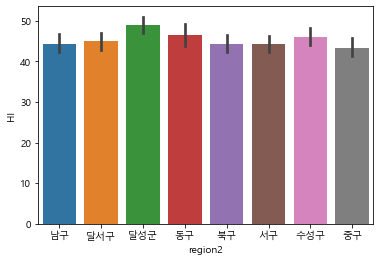

In [90]:
sns.barplot(data=group, x='region2', y='HI')

<AxesSubplot:xlabel='region2', ylabel='temp'>

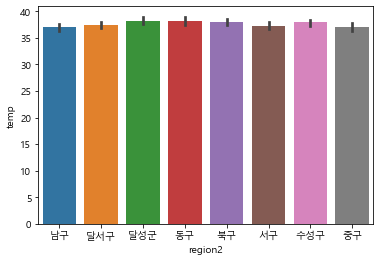

In [91]:
sns.barplot(data=group, x='region2', y='temp')

<AxesSubplot:xlabel='year', ylabel='HI'>

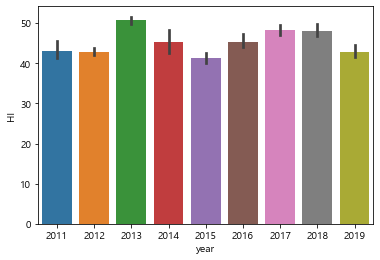

In [92]:
sns.barplot(data=group, x='year', y='HI')

C:\Users\User\AppData\Local\Temp\ipykernel_24644\2298838103.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(group_area.corr(), dtype=np.bool)
c:\final_project\Team_Project\.venv\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:>

c:\final_project\Team_Project\.venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


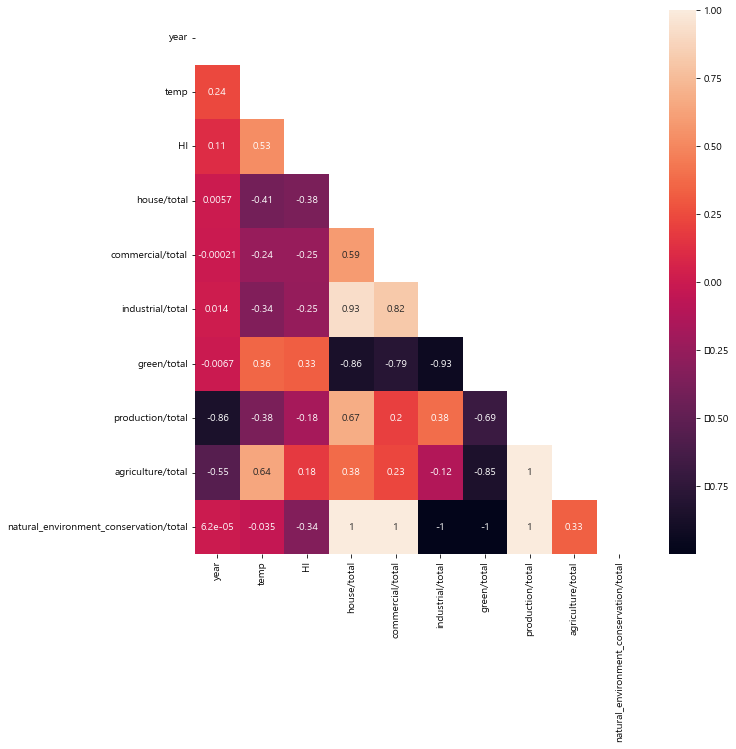

In [89]:
plt.figure(figsize=(10, 10))
mask = np.zeros_like(group_area.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(group_area.corr(), annot=True, mask=mask,)

<AxesSubplot:xlabel='temp', ylabel='HI'>

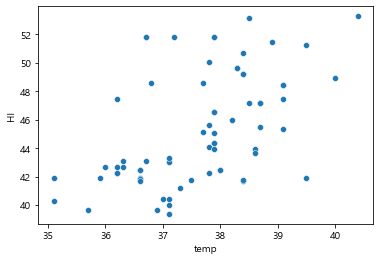

In [79]:
sns.scatterplot(x='temp', y='HI', data=group)

<AxesSubplot:xlabel='year', ylabel='HI'>

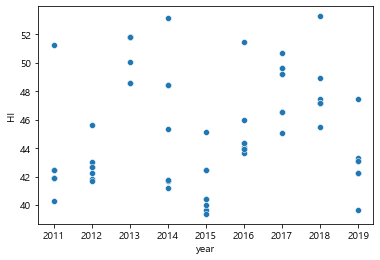

In [83]:
sns.scatterplot(x='year', y='HI', data=group)

<AxesSubplot:xlabel='HI', ylabel='agriculture/total'>

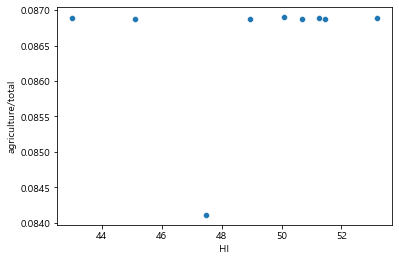

In [81]:
sns.scatterplot(x='HI', y='agriculture/total', data=group)

# 4. 기저질환 환자가 온열질환 취약계층이다.
- made by 

# 5. 대구의 지형 특징상(분지) 열섬현상이 자주 발생한다.
- made by 

# 6. 겨울에 추우면 전력 소비량과 온실 가스 배출량이 늘어 여름에 덥다.
- made by 

# 7. 교통량이 많으면 엔진의 열배출이 기온에 영향을 미친다. 
- made by 

# 8. 비가 온 날이 많으면 폭염기간에 열지수가 높다. (폭염과 습도의 관계)
- made by 

# 9. 대기중의 미세먼지 농도가 높으면 온도가 높다.(‘미세먼지가 많으면 통풍이 잘 안된다’ 속설 검증)
- made by 

# 10. 나무를 많이 심으면 온도가 떨어진다. (대구 녹지사업 참고)
- made by EH

In [132]:
final=pd.read_csv('./dataset/daegu/daegu_final.csv')

In [133]:
final

,year,month,day,hour,datetime,temp,rainfall,lightning,humidity,wind_speed,wind_direction,condition,region,HI,DI
0,2010,6,1,0,2010-06-01 00:00:00,16.5,0.0,-1,53.0,NaN,NaN,1,동인동,15.589444,60.74355
1,2010,6,1,1,2010-06-01 01:00:00,18.1,0.0,-1,49.0,NaN,NaN,1,동인동,17.245000,62.73431
2,2010,6,1,2,2010-06-01 02:00:00,19.7,0.0,-1,46.0,NaN,NaN,1,동인동,18.926667,64.65038
3,2010,6,1,3,2010-06-01 03:00:00,20.8,0.0,-1,41.0,NaN,NaN,1,동인동,20.006111,65.72772
4,2010,6,1,4,2010-06-01 04:00:00,22.2,0.0,-1,36.0,NaN,NaN,2,동인동,21.415556,67.04608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14831611,2022,4,30,19,2022-04-30 19:00:00,10.7,0.0,-1,71.0,2.1,335.0,-1,구지면,9.679444,52.33503
14831612,2022,4,30,20,2022-04-30 20:00:00,11.0,0.0,-1,65.0,2.2,339.0,-1,구지면,9.852778,52.99350
14831613,2022,4,30,21,2022-04-30 21:00:00,11.9,0.0,-1,61.0,2.2,338.0,-1,구지면,10.738333,54.40241
14831614,2022,4,30,22,2022-04-30 22:00:00,13.4,0.0,-1,53.0,2.0,351.0,-1,구지면,12.179444,56.60598


In [135]:
df_region = pd.read_csv('./dataset/daegu/0 REGION.csv')
df_region

C:\Users\User\AppData\Local\Temp\ipykernel_24644\3853929173.py:1: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_region = pd.read_csv('./dataset/daegu/0 REGION.csv')


,1단계,2단계,3단계
0,대구광역시,중구,동인동
1,대구광역시,중구,삼덕동
2,대구광역시,중구,성내1동
3,대구광역시,중구,성내2동
4,대구광역시,중구,성내3동
...,...,...,...
1044924,NaN,NaN,NaN
1044925,NaN,NaN,NaN
1044926,NaN,NaN,NaN
1044927,NaN,NaN,NaN


In [136]:
index_None = df_region[df_region['1단계'].isna()].index
df_region.drop(index_None, inplace=True)
df_region.drop('1단계', axis=1, inplace=True)
df_region.columns = ['region2','region']

In [137]:
df_region

,region2,region
0,중구,동인동
1,중구,삼덕동
2,중구,성내1동
3,중구,성내2동
4,중구,성내3동
...,...,...
137,달성군,옥포읍
138,달성군,현풍읍
139,달성군,가창면
140,달성군,하빈면


In [138]:
df_10 = final.merge(df_region, on='region')

In [139]:
df_10

,year,month,day,hour,datetime,temp,rainfall,lightning,humidity,wind_speed,wind_direction,condition,region,HI,DI,region2
0,2010,6,1,0,2010-06-01 00:00:00,16.5,0.0,-1,53.0,NaN,NaN,1,동인동,15.589444,60.74355,중구
1,2010,6,1,1,2010-06-01 01:00:00,18.1,0.0,-1,49.0,NaN,NaN,1,동인동,17.245000,62.73431,중구
2,2010,6,1,2,2010-06-01 02:00:00,19.7,0.0,-1,46.0,NaN,NaN,1,동인동,18.926667,64.65038,중구
3,2010,6,1,3,2010-06-01 03:00:00,20.8,0.0,-1,41.0,NaN,NaN,1,동인동,20.006111,65.72772,중구
4,2010,6,1,4,2010-06-01 04:00:00,22.2,0.0,-1,36.0,NaN,NaN,2,동인동,21.415556,67.04608,중구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14727163,2022,4,30,19,2022-04-30 19:00:00,10.7,0.0,-1,71.0,2.1,335.0,-1,구지면,9.679444,52.33503,달성군
14727164,2022,4,30,20,2022-04-30 20:00:00,11.0,0.0,-1,65.0,2.2,339.0,-1,구지면,9.852778,52.99350,달성군
14727165,2022,4,30,21,2022-04-30 21:00:00,11.9,0.0,-1,61.0,2.2,338.0,-1,구지면,10.738333,54.40241,달성군
14727166,2022,4,30,22,2022-04-30 22:00:00,13.4,0.0,-1,53.0,2.0,351.0,-1,구지면,12.179444,56.60598,달성군


In [145]:
# 대구 공원데이터 로드(2010' - 2019')
tree=pd.read_csv('./dataset/daegu/daegu_tree.csv', encoding='cp949')
tree

,시점,행정구역(구군)별(1),공원
0,2010,중구,199274.7
1,2010,동구,634963.3
2,2010,서구,61716.0
3,2010,남구,2677733.7
4,2010,북구,676553.9
...,...,...,...
75,2019,남구,2676401.9
76,2019,북구,947977.6
77,2019,수성구,715909.2
78,2019,달서구,2309668.4


In [147]:
# 컬럼명 변경
tree.columns=['year', 'region2', 'park_m2']
tree

,year,region2,park_m2
0,2010,중구,199274.7
1,2010,동구,634963.3
2,2010,서구,61716.0
3,2010,남구,2677733.7
4,2010,북구,676553.9
...,...,...,...
75,2019,남구,2676401.9
76,2019,북구,947977.6
77,2019,수성구,715909.2
78,2019,달서구,2309668.4


In [148]:
# 연도별 공원넓이 합계
year=tree.groupby('year', as_index=False).sum()
year

,year,park_m2
0,2010,7551595.7
1,2011,7639127.0
2,2012,7873855.7
3,2013,8140407.5
4,2014,9837769.0
5,2015,10458100.7
6,2016,10638112.3
7,2017,11504734.5
8,2018,11688471.6
9,2019,11944614.9


<AxesSubplot:xlabel='year', ylabel='park_m2'>

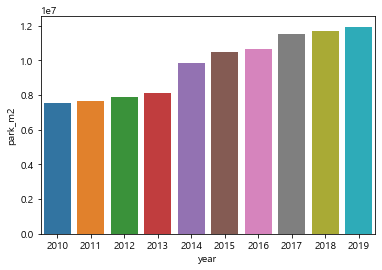

In [96]:
# 연도별 공원넓이
sns.barplot(data=year, x='year', y='park_m2')

In [149]:
# 구별 공원넓이 합계
area=tree.groupby('region2', as_index=False)['park_m2'].sum()
area

,region2,park_m2
0,남구,26766814.6
1,달서구,21567651.0
2,달성군,19534193.9
3,동구,13340621.0
4,북구,7832746.1
5,서구,740895.3
6,수성구,5466812.8
7,중구,2027054.2


In [150]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='region2', ylabel='park_m2'>

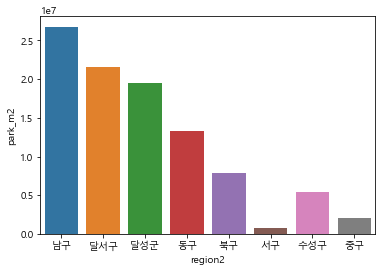

In [152]:
# 구별 공원 넓이
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.barplot(data=area, x='region2', y='park_m2')

In [153]:
# 기상데이터와 공원데이터를 year와 region2 기준으로 병합
df_tree=pd.merge(left=df_10, right=tree, how='left', on=['year','region2'], sort=False)
df_tree

,year,month,day,hour,datetime,temp,rainfall,lightning,humidity,wind_speed,wind_direction,condition,region,HI,DI,region2,park_m2
0,2010,6,1,0,2010-06-01 00:00:00,16.5,0.0,-1,53.0,NaN,NaN,1,동인동,15.589444,60.74355,중구,199274.7
1,2010,6,1,1,2010-06-01 01:00:00,18.1,0.0,-1,49.0,NaN,NaN,1,동인동,17.245000,62.73431,중구,199274.7
2,2010,6,1,2,2010-06-01 02:00:00,19.7,0.0,-1,46.0,NaN,NaN,1,동인동,18.926667,64.65038,중구,199274.7
3,2010,6,1,3,2010-06-01 03:00:00,20.8,0.0,-1,41.0,NaN,NaN,1,동인동,20.006111,65.72772,중구,199274.7
4,2010,6,1,4,2010-06-01 04:00:00,22.2,0.0,-1,36.0,NaN,NaN,2,동인동,21.415556,67.04608,중구,199274.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14727163,2022,4,30,19,2022-04-30 19:00:00,10.7,0.0,-1,71.0,2.1,335.0,-1,구지면,9.679444,52.33503,달성군,NaN
14727164,2022,4,30,20,2022-04-30 20:00:00,11.0,0.0,-1,65.0,2.2,339.0,-1,구지면,9.852778,52.99350,달성군,NaN
14727165,2022,4,30,21,2022-04-30 21:00:00,11.9,0.0,-1,61.0,2.2,338.0,-1,구지면,10.738333,54.40241,달성군,NaN
14727166,2022,4,30,22,2022-04-30 22:00:00,13.4,0.0,-1,53.0,2.0,351.0,-1,구지면,12.179444,56.60598,달성군,NaN


In [154]:
# Null 확인
df_tree.isna().sum()

year                    0
month                   0
day                     0
hour                    0
datetime                0
temp                    0
rainfall                0
lightning               0
humidity                0
wind_speed         637179
wind_direction     637179
condition               0
region                  0
HI                      0
DI                      0
region2                 0
park_m2           2879784
dtype: int64

In [155]:
# drop Null
df_dropna=df_tree.dropna()
df_dropna

,year,month,day,hour,datetime,temp,rainfall,lightning,humidity,wind_speed,wind_direction,condition,region,HI,DI,region2,park_m2
4519,2010,12,6,7,2010-12-06 07:00:00,11.6,0.0,-1,32.0,4.1,304.0,3,동인동,9.651111,54.79488,중구,199274.7
4520,2010,12,6,8,2010-12-06 08:00:00,10.6,0.0,-1,35.0,3.6,300.0,3,동인동,8.629444,53.55390,중구,199274.7
4521,2010,12,6,9,2010-12-06 09:00:00,9.2,0.0,-1,27.0,3.8,295.0,3,동인동,6.880556,52.35016,중구,199274.7
4522,2010,12,6,10,2010-12-06 10:00:00,7.9,0.0,-1,34.0,4.1,281.0,4,동인동,5.633333,50.49614,중구,199274.7
4523,2010,12,6,11,2010-12-06 11:00:00,5.7,0.0,-1,44.0,3.6,298.0,2,동인동,3.474444,47.10792,중구,199274.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14706739,2019,12,31,19,2019-12-31 19:00:00,-4.3,0.0,-1,61.0,1.6,333.0,-1,구지면,-4.300000,31.49723,달성군,3052105.8
14706740,2019,12,31,20,2019-12-31 20:00:00,-4.3,0.0,-1,64.0,3.1,329.0,-1,구지면,-4.300000,30.94052,달성군,3052105.8
14706741,2019,12,31,21,2019-12-31 21:00:00,-3.7,0.0,-1,67.0,2.0,337.0,-1,구지면,-3.700000,31.26779,달성군,3052105.8
14706742,2019,12,31,22,2019-12-31 22:00:00,-2.4,0.0,-1,70.0,1.5,330.0,-1,구지면,-2.400000,32.68280,달성군,3052105.8


In [157]:
# year, region2 기준으로 그룹화 - park_m2 최고값, temp 최고값 계산
group=df_dropna.groupby(['year', 'region2'], as_index=False)['region',  'temp', 'park_m2', 'HI', 'DI', 'humidity'].max()
group

C:\Users\User\AppData\Local\Temp\ipykernel_24644\1782250.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group=df_dropna.groupby(['year', 'region2'], as_index=False)['region',  'temp', 'park_m2', 'HI', 'DI', 'humidity'].max()


,year,region2,region,temp,park_m2,HI,DI,humidity
0,2010,남구,이천동,13.2,2677733.7,11.655556,56.72096,94.0
1,2010,달서구,진천동,13.5,2064684.4,11.655556,57.02930,100.0
2,2010,달성군,화원읍,15.0,747991.4,13.234444,58.59300,100.0
3,2010,동구,효목2동,13.6,634963.3,11.655556,57.11536,100.0
4,2010,북구,태전2동,13.6,676553.9,11.668333,57.14044,96.0
...,...,...,...,...,...,...,...,...
75,2019,동구,효목2동,36.7,1948899.4,43.105405,86.04238,100.0
76,2019,북구,태전2동,37.1,947977.6,43.288116,86.25498,100.0
77,2019,서구,평리6동,36.2,82240.0,42.257394,85.70320,100.0
78,2019,수성구,황금2동,36.3,715909.2,43.105405,86.04238,100.0


In [158]:
group.corr()

,year,temp,park_m2,HI,DI,humidity
year,1.000000,0.546383,0.208768,0.427816,0.499245,0.235182
temp,0.546383,1.000000,0.095619,0.938892,0.986663,0.553871
park_m2,0.208768,0.095619,1.000000,0.114459,0.109121,0.048503
HI,0.427816,0.938892,0.114459,1.000000,0.977866,0.542816
DI,0.499245,0.986663,0.109121,0.977866,1.000000,0.565902
humidity,0.235182,0.553871,0.048503,0.542816,0.565902,1.000000


<AxesSubplot:>

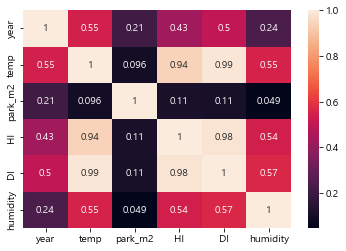

In [200]:
sns.heatmap(group.corr(), annot=True)

Text(0.5, 1.0, '공원넓이와 습도 산점도')

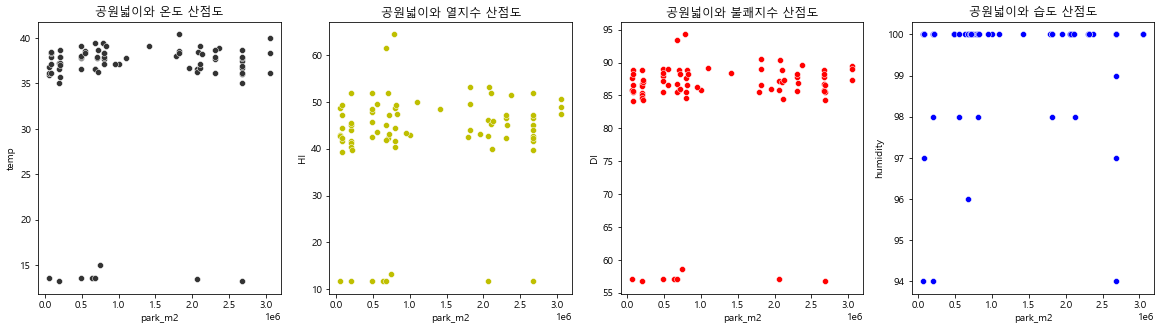

In [198]:
# plt.figure(figsize=(10,10))
fig, ax = plt.subplots(ncols=4, figsize=(20, 5))

# 공원넓이와 온도 산점도
sns.scatterplot(data=group, x='park_m2', y='temp', ax=ax[0], color='.2')
ax[0].set_title("공원넓이와 온도 산점도")
# 공원 넓이와 열지수 산점도
sns.scatterplot(data=group, x='park_m2', y='HI', ax=ax[1], color='y')
ax[1].set_title("공원넓이와 열지수 산점도")
# 공원 넓이와 불쾌지수 산점도
sns.scatterplot(data=group, x='park_m2', y='DI', ax=ax[2], color='r')
ax[2].set_title("공원넓이와 불쾌지수 산점도")
# 공원 넓이와 습도 산점도
sns.scatterplot(data=group, x='park_m2', y='humidity', ax=ax[3], color='b')
ax[3].set_title("공원넓이와 습도 산점도")

- 녹지사업과 여름철 온도와의 상관관계는 보이지 않는다.

In [ ]:
#test